Задачи 1 и 2
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

In [25]:
%matplotlib inline
import numpy as np
import random as rnd
import pandas as pd
import math
import matplotlib.pyplot as plt

In [86]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

def p_value(n: int, k: int, p: float) -> int:
    
    return combinations(n, k) * ((1 - p)**(n-k)) * (p**k)

In [4]:
values = []
probabilities = [] 

for i in range(0,6):
    values.append(i)
    probabilities.append(p_value(5, i, 0.25))

z = pd.DataFrame({'value': values, 'probability': probabilities})
z.head(10)

,value,probability
0,0,0.237305
1,1,0.395508
2,2,0.263672
3,3,0.087891
4,4,0.014648
5,5,0.000977


In [5]:
m = sum([value*probability for value,probability in zip(values,probabilities)])
y_values = [value - m for value in values]
z_values = [y_value**2 for y_value in y_values]
d = sum([probability*z_value for probability,z_value in zip(probabilities, z_values)])

print (m, y_values, z_values, d)

1.25 [-1.25, -0.25, 0.75, 1.75, 2.75, 3.75] [1.5625, 0.0625, 0.5625, 3.0625, 7.5625, 14.0625] 0.9375


Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [17]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

,N,probability
7,8,0.09
8,9,0.11
9,10,0.13
10,11,0.13
11,12,0.11
12,13,0.09


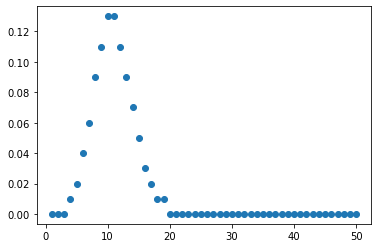

In [44]:
k = 0
lambda_ = 10.0
k_ = []
p_ = []

while k < 50:
    p = poisson_proba(k, lambda_)
    if p != 0.95:
        k += 1
        k_.append(k)
        p_.append(round(p, 2))
    else:
        print(k)
        break

plt.scatter(k_, p_)
z = pd.DataFrame({'N': k_, 'probability': p_})
z[7:13]

Ответ: самая близкая вероятность к заданной находится в промежутке от 10 до 11 писем, до этого промежутка и далее значения вероятности падают и далеки от 0.95

Задача 4

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [94]:
p_value(n, 6, 0.01)
